# Sketch2aia - Abordagem com *Deep Learning*

Para a abordagem utilizando *Deep Learning*, se optou pela utilização do YoloV5 devido aos bons resultados obtidos anteriormente com YoloV3 e YoloV4, sua boa performance em geral e o baixo impacto de seus principais pontos fracos no problema em questão.


## YoloV5

YOLO (*You Only Look Once*) é um algoritmo de detecção de objetos que divide a imagem em um sistema de grades, com cada célula na grade sendo responsável pela detecção de objetos dentro de si:

<img src="media/YoloDog.png" width=600/>

Desde sua criação, o modelo YOLO se tornou um dos modelos de detecção de objetos mais famosos, devido a sua velocidade e acurácia.

A equipe já havia realizado experimentos com YoloV3 e YoloV4, obtendo bons resultados, logo, foi decidido utilizar o YoloV5, onde o modelo YOLO foi então introduzido ao framework PyTorch.

São disponibilizados diversos modelos de YoloV5, com modelos mais simples focando em maior velocidade de processamento de imagens ou uso de memória, enquanto os modelos maiores tem maior foco em acurácia:

<img src="media/YoloModels.png" width=600/>

<img src="media/YoloModelsPerformance.png" width=600/>

Foram realizados testes com diversos modelos, com os melhores resultados sendo obtidos com o `Yolov5m6`:

![Model Tests](media/YoloModelsTests.png)

## Conjunto de Dados

Para o treinamento do classificador, e para a realização de testes, foi preparado um conjunto de dados de *sketches* de interfaces de usuário, feitos com base em *screenshot* de aplicativos App Inventor:

| Screenshot                              | *Sketch*
| :-------------------------------------: | :--------------------------------------:
| <img src="media/ExampleScreenshot1.png" width=256/> | <img src="media/ExampleSketch1.jpg" width=256/>

Foram selecionados originalmente *screenshots* com apenas os 9 componentes mais comuns em aplicativos de App Inventor<a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1), visando simplificar a tarefa de classificação destes, visto que outros componentes muito pouco utilizados são visualmente muito parecidos em *sketches*:

| Label                                   | Button                                   | TextBox
| :-------------------------------------: | :--------------------------------------: | :----:
| <img src="media/Label1.jpg" width=256/> | <img src="media/Botao1.jpg" width=256/>  | <img src="media/TextBox1.jpg" width=256/> 

| Checkbox                                | Slider                                   | ListPicker
| :-------------------------------------: | :--------------------------------------: | :----:
| <img src="media/Checkbox1.jpg" width=256/> | <img src="media/Slider1.jpg" width=256/> | <img src="media/ListPicker1.jpg" width=256/>

| Switch                                   | Image                                    | Map
| :-------------------------------------:  | :--------------------------------------: | :----:
| <img src="media/Switch1.jpg" width=256/> | <img src="media/Image1.jpg" width=256/>  | <img src="media/Map1.jpg" width=256/>

Com a ajuda de voluntários, foram coletados *sketches* com base nestes *screenshots* selecionados, gerando assim um conjunto de dados completo com diversos estilos de desenho e com variação de câmera e condições luminosas:

<table><tr>
    <td> <img src="media/ExampleSketch2.jpg" width=256/> </td>
    <td> <img src="media/ExampleSketch3.jpg" width=256/> </td>
    <td> <img src="media/ExampleSketch4.jpg" width=256/> </td>
</tr></table>

Os *sketches* feitos pelos voluntários foram então rotulados manualmente, com anotações de posição e tipo de cada componente, bem como a posição da tela (*screen*) como um todo:

<img src="media/Annotations.png" width=600/>

Resultando em um conjunto de dados com 402 imagens de *sketches* de interfaces de usuário, com anotações de 3584 componentes:

![Class Balance](media/ClassBalance2.png)

Estas foram divididas em conjuntos de treino, validação e testes com as seguintes proporções<a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1):

![Split](media/Split2.png)

In [1]:
# Clone YOLOv5 and install dependencies
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

# Import libs
import torch
import os
from IPython.display import Image, clear_output

# Check if cuda enabled
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

C:\Users\dsbau\OneDrive\Documents\UFSC\Mestrado\2oSemestre\INE410121-VisaoComputacional\INE410121-VisaoComputacional\yolov5


fatal: destination path 'yolov5' already exists and is not an empty directory.


Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'


Note: you may need to restart the kernel to use updated packages.
Setup complete. Using torch 1.10.2+cpu (CPU)


In [9]:
# Configure model
os.environ["MODEL_NAME"] = "yolov5m6"

## Avaliação do Modelo

Métricas do treinamento do modelo podem ser obtidas por meio do Tensorboard:

In [5]:
!python val.py --weights ../yolov5m6/weights/best.pt --data ../CompleteSketchesDataset/data.yaml

val: data=../CompleteSketchesDataset/data.yaml, weights=['../yolov5m6/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs\val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5  v6.1-61-gbc3ed95 torch 1.10.2+cpu CPU

Fusing layers... 
Model summary: 378 layers, 35300868 parameters, 0 gradients, 49.1 GFLOPs

val: Scanning 'C:\Users\dsbau\OneDrive\Documents\UFSC\Mestrado\2oSemestre\INE410121-VisaoComputacional\INE410121-VisaoComputacional\yolov5\..\CompleteSketchesDataset\valid\labels' images and labels...:   0%|          | 0/80 [00:00<?, ?it/s]
val: Scanning 'C:\Users\dsbau\OneDrive\Documents\UFSC\Mestrado\2oSemestre\INE410121-VisaoComputacional\INE410121-VisaoComputacional\yolov5\..\CompleteSketchesDataset\valid\labels' images and labels...1 found, 0 missing, 0 empty, 0 corrupt:   1%|1         | 1/

To view results, fill out the folder where results were saved:

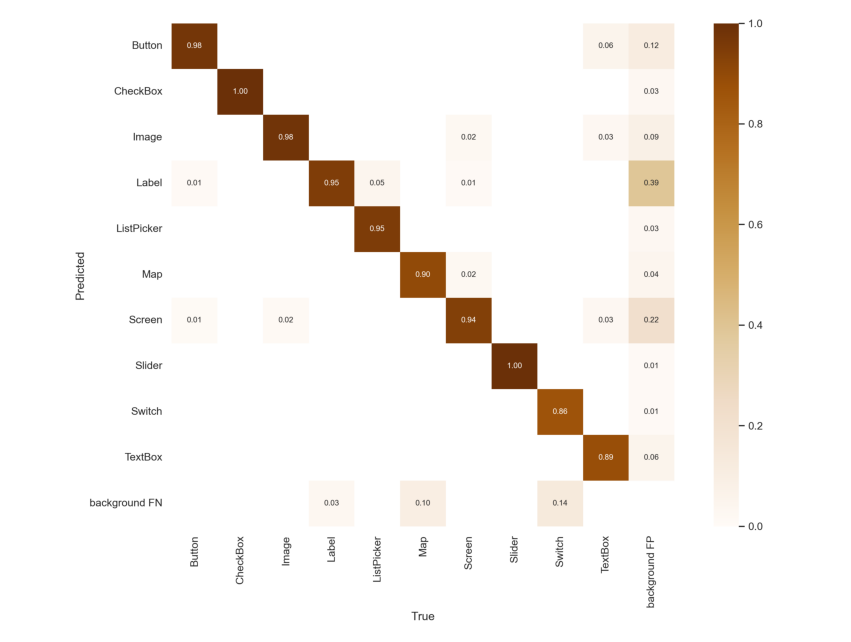

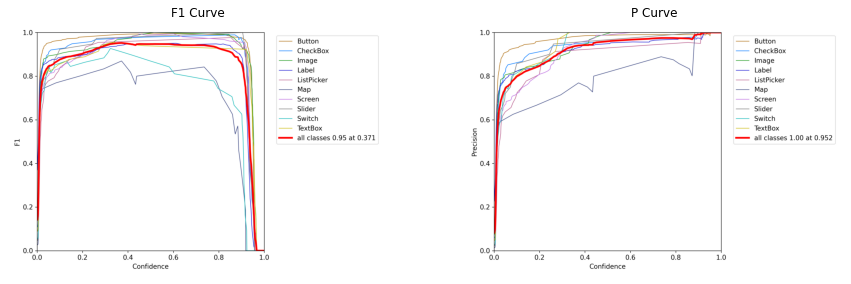

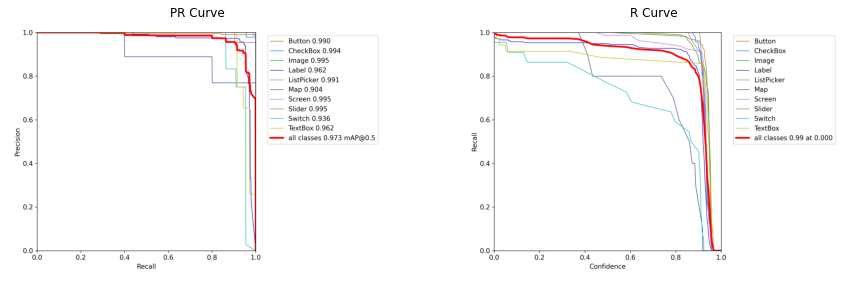

In [28]:
import os
import cv2
import matplotlib.pyplot as plt

results_folder = 'runs/val/exp11'

confusion_matrix_path = os.path.join(results_folder, 'confusion_matrix.png')
f1_curve_path = os.path.join(results_folder, 'F1_curve.png')
p_curve_path = os.path.join(results_folder, 'P_curve.png')
pr_curve_path = os.path.join(results_folder, 'PR_curve.png')
r_curve_path = os.path.join(results_folder, 'R_curve.png')

fig1, ax = plt.subplots()

ax.axis('off')
confusion_matrix = cv2.imread(confusion_matrix_path)
ax.imshow(confusion_matrix, cmap=plt.cm.gray)

fig2, (ax21, ax22) = plt.subplots(1, 2)

f1_curve = cv2.imread(f1_curve_path)
p_curve = cv2.imread(p_curve_path)

ax21.set_title('F1 Curve')
ax21.imshow(f1_curve, cmap=plt.cm.gray)
ax21.axis('off')
ax22.set_title('P Curve')
ax22.imshow(p_curve, cmap=plt.cm.gray)
ax22.axis('off')

fig2, (ax31, ax32) = plt.subplots(1, 2)

pr_curve = cv2.imread(pr_curve_path)
r_curve = cv2.imread(r_curve_path)

ax31.set_title('PR Curve')
ax31.imshow(pr_curve, cmap=plt.cm.gray)
ax31.axis('off')
ax32.set_title('R Curve')
ax32.imshow(r_curve, cmap=plt.cm.gray)
ax32.axis('off')

plt.show()